# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [40]:
# set units 
units = 'metric'

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [41]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&appid={weather_api_key}"
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | selebi-phikwe
Processing Record 2 of Set 1 | yarmouth
Processing Record 3 of Set 1 | fort bragg
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | howard springs
Processing Record 6 of Set 1 | nabire
Processing Record 7 of Set 1 | arkhangel'sk
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | segezha
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | houghton
Processing Record 16 of Set 1 | chongwe
Processing Record 17 of Set 1 | tamiahua
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | kiunga
P

Processing Record 37 of Set 4 | san andres
Processing Record 38 of Set 4 | igarka
Processing Record 39 of Set 4 | quelimane
Processing Record 40 of Set 4 | tsiombe
Processing Record 41 of Set 4 | kirakira
Processing Record 42 of Set 4 | riviere-du-loup
Processing Record 43 of Set 4 | polyarnyy
Processing Record 44 of Set 4 | villa luvianos
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | pacific grove
Processing Record 47 of Set 4 | nar'yan-mar
Processing Record 48 of Set 4 | enewetak
Processing Record 49 of Set 4 | antalaha
Processing Record 0 of Set 5 | riosucio
Processing Record 1 of Set 5 | muswellbrook
Processing Record 2 of Set 5 | vilyuchinsk
Processing Record 3 of Set 5 | yel'nya
Processing Record 4 of Set 5 | punta del este
Processing Record 5 of Set 5 | maposeni
Processing Record 6 of Set 5 | lembar
City not found. Skipping...
Processing Record 7 of Set 5 | kuta
Processing Record 8 of Set 5 | palangkaraya
Processing Record 9 of Set 5 | jalai nur
Processing 

Processing Record 26 of Set 8 | kalianget
Processing Record 27 of Set 8 | winfield
Processing Record 28 of Set 8 | hoyerswerda
Processing Record 29 of Set 8 | nassau
Processing Record 30 of Set 8 | saint-joseph
Processing Record 31 of Set 8 | alo
Processing Record 32 of Set 8 | labytnangi
Processing Record 33 of Set 8 | prince rupert
Processing Record 34 of Set 8 | magadan
Processing Record 35 of Set 8 | la passe
Processing Record 36 of Set 8 | brookings
Processing Record 37 of Set 8 | dobrinka
Processing Record 38 of Set 8 | prado
Processing Record 39 of Set 8 | krnov
Processing Record 40 of Set 8 | loen
Processing Record 41 of Set 8 | gadzhiyevo
Processing Record 42 of Set 8 | kampong thom
Processing Record 43 of Set 8 | horta
Processing Record 44 of Set 8 | talcahuano
Processing Record 45 of Set 8 | ahau
City not found. Skipping...
Processing Record 46 of Set 8 | ingeniero jacobacci
Processing Record 47 of Set 8 | mkushi
Processing Record 48 of Set 8 | ulsteinvik
Processing Record 4

City not found. Skipping...
Processing Record 15 of Set 12 | pio xii
Processing Record 16 of Set 12 | lamu
Processing Record 17 of Set 12 | noumea
Processing Record 18 of Set 12 | nguigmi
Processing Record 19 of Set 12 | selfoss
Processing Record 20 of Set 12 | sumbe
Processing Record 21 of Set 12 | argo
Processing Record 22 of Set 12 | xining
Processing Record 23 of Set 12 | malanje
Processing Record 24 of Set 12 | kapustin yar
Processing Record 25 of Set 12 | dzhetygara
Processing Record 26 of Set 12 | ola
Processing Record 27 of Set 12 | tionk essil
Processing Record 28 of Set 12 | corral de almaguer
Processing Record 29 of Set 12 | grants
Processing Record 30 of Set 12 | thulamahashi
Processing Record 31 of Set 12 | iganga
Processing Record 32 of Set 12 | floro
Processing Record 33 of Set 12 | merizo village
Processing Record 34 of Set 12 | esfarayen
Processing Record 35 of Set 12 | longjing
Processing Record 36 of Set 12 | fort st. john
Processing Record 37 of Set 12 | manokwari
P

In [42]:
# Convert the cities weather data into a Pandas DataFra
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,selebi-phikwe,-21.9790,27.8498,295.44,51,76,4.35,BW,1699120966
1,yarmouth,41.7057,-70.2286,290.35,58,0,4.63,US,1699120966
2,fort bragg,35.1390,-79.0060,296.29,39,0,2.57,US,1699120966
3,uturoa,-16.7333,-151.4333,298.54,84,88,8.09,PF,1699120967
4,howard springs,-12.4970,131.0470,300.10,86,99,2.39,AU,1699120967


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [45]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,selebi-phikwe,-21.9790,27.8498,295.44,51,76,4.35,BW,1699120966
1,yarmouth,41.7057,-70.2286,290.35,58,0,4.63,US,1699120966
2,fort bragg,35.1390,-79.0060,296.29,39,0,2.57,US,1699120966
3,uturoa,-16.7333,-151.4333,298.54,84,88,8.09,PF,1699120967
4,howard springs,-12.4970,131.0470,300.10,86,99,2.39,AU,1699120967


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

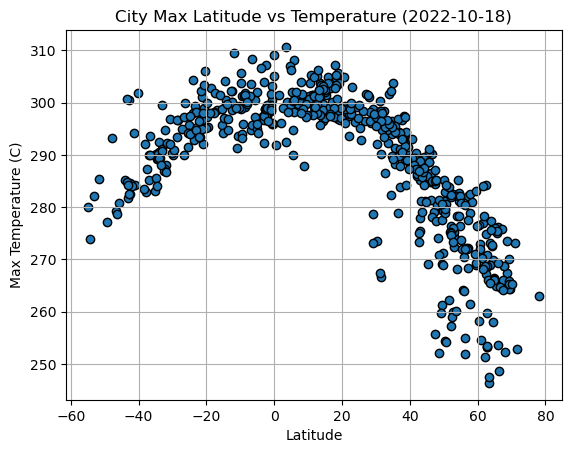

In [46]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

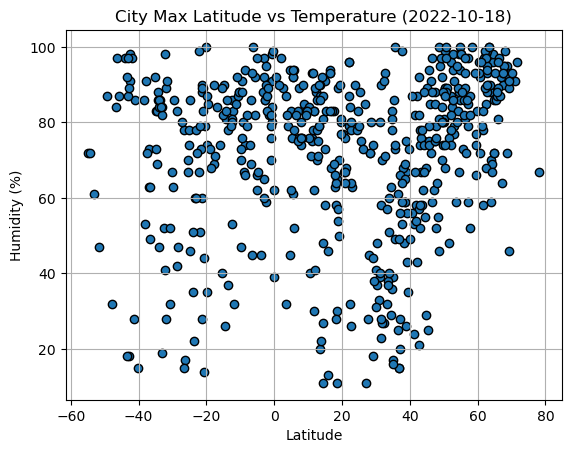

In [47]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

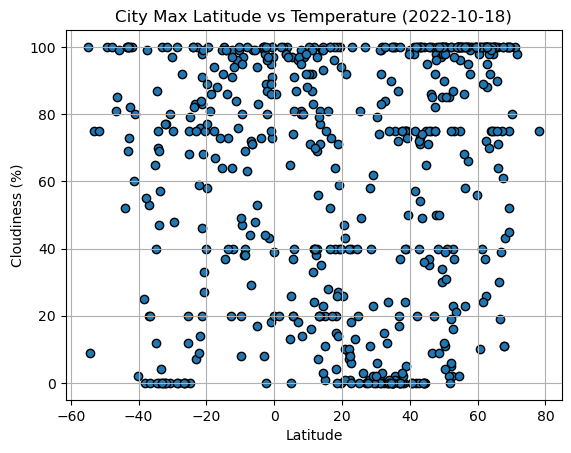

In [48]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

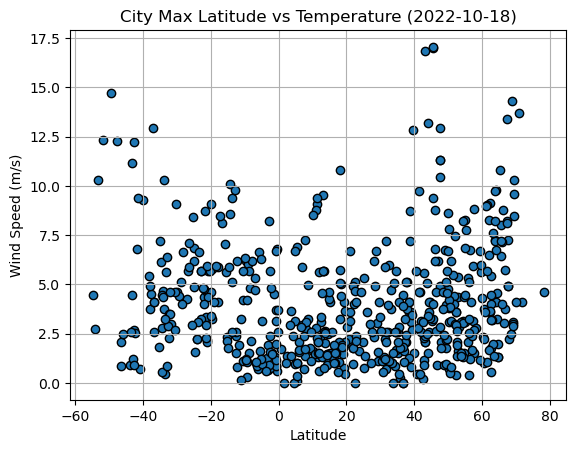

In [49]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [52]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [53]:
# Split data into northern hemispheres: based on latitude
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yarmouth,41.7057,-70.2286,290.35,58,0,4.63,US,1699120966
2,fort bragg,35.1390,-79.0060,296.29,39,0,2.57,US,1699120966
6,arkhangel'sk,64.5401,40.5433,269.89,96,98,4.57,RU,1699120968
7,ust-nera,64.5667,143.2000,258.06,98,100,3.22,RU,1699120968
8,georgetown,5.4112,100.3354,300.34,92,20,1.03,MY,1699120670


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,selebi-phikwe,-21.9790,27.8498,295.44,51,76,4.35,BW,1699120966
3,uturoa,-16.7333,-151.4333,298.54,84,88,8.09,PF,1699120967
4,howard springs,-12.4970,131.0470,300.10,86,99,2.39,AU,1699120967
5,nabire,-3.3667,135.4833,297.37,88,100,1.29,ID,1699120967
9,margaret river,-33.9500,115.0667,292.51,47,47,3.74,AU,1699120968


In [55]:
# y_variables
#y_variables = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#for variable in y_variables:
#    create_linear_regression_plot(northern_hemisphere, variable, "Northern")
#    create_linear_regression_plot(northern_hemisphere, variable, "Southern")

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yarmouth,41.7057,-70.2286,290.35,58,0,4.63,US,1699120966
2,fort bragg,35.1390,-79.0060,296.29,39,0,2.57,US,1699120966
6,arkhangel'sk,64.5401,40.5433,269.89,96,98,4.57,RU,1699120968
7,ust-nera,64.5667,143.2000,258.06,98,100,3.22,RU,1699120968
8,georgetown,5.4112,100.3354,300.34,92,20,1.03,MY,1699120670


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,selebi-phikwe,-21.9790,27.8498,295.44,51,76,4.35,BW,1699120966
3,uturoa,-16.7333,-151.4333,298.54,84,88,8.09,PF,1699120967
4,howard springs,-12.4970,131.0470,300.10,86,99,2.39,AU,1699120967
5,nabire,-3.3667,135.4833,297.37,88,100,1.29,ID,1699120967
9,margaret river,-33.9500,115.0667,292.51,47,47,3.74,AU,1699120968


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8505688663732832


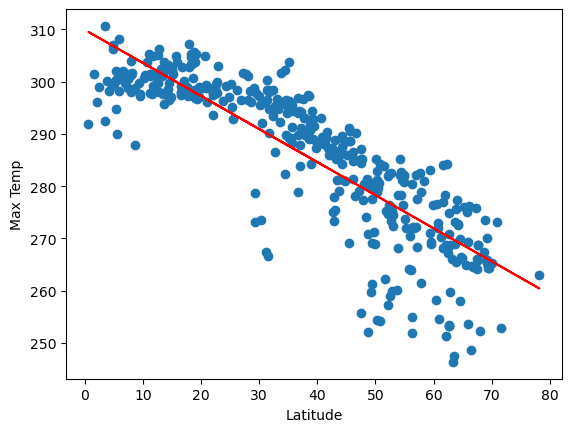

In [58]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7437690250780409


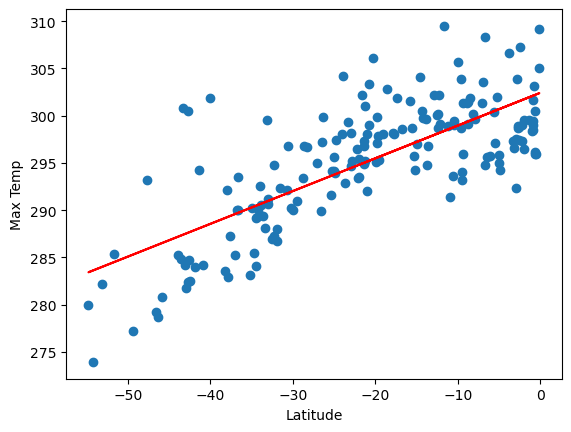

In [59]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

Discussion about the linear relationship: In the northern hemisphere there is a negative value for the r value meaning there is a 'perfect negative correlation' between latitude and Max Temp. And in the southern hemisphere there is a positive value for the r value meaning there is a 'perfect positive correlation' between latitude and Max Temp. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24984792606100703


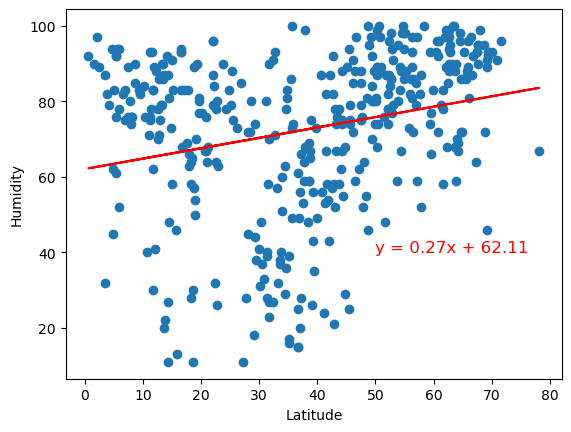

In [60]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.16460451161795517


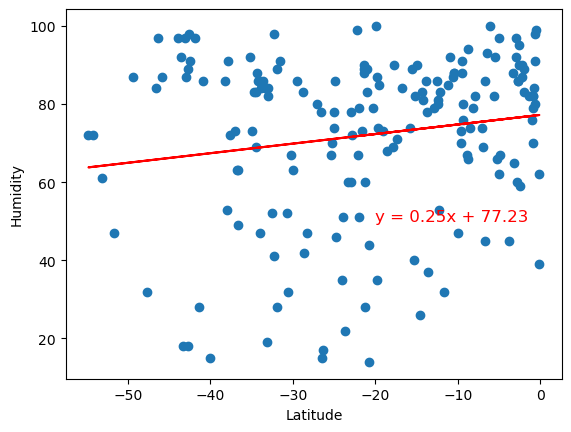

In [61]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

Discussion about the linear relationship: In the northern hemisphere there is a positive value for the r value meaning there is a 'perfect positive correlation' between latitude and humidity. And in the southern hemisphere there is a positive value for the r value meaning there is a 'perfect positive correlation' between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23098664784626635


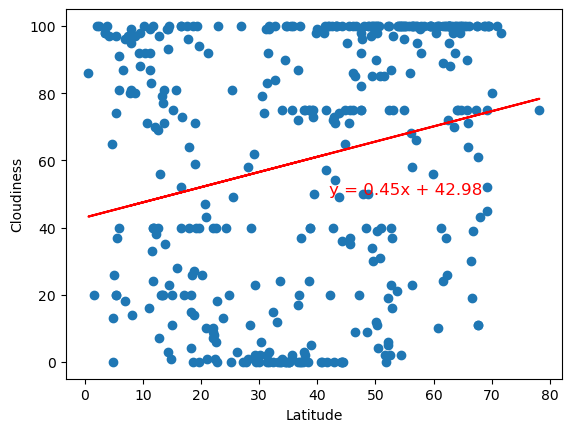

In [62]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.13673147484539344


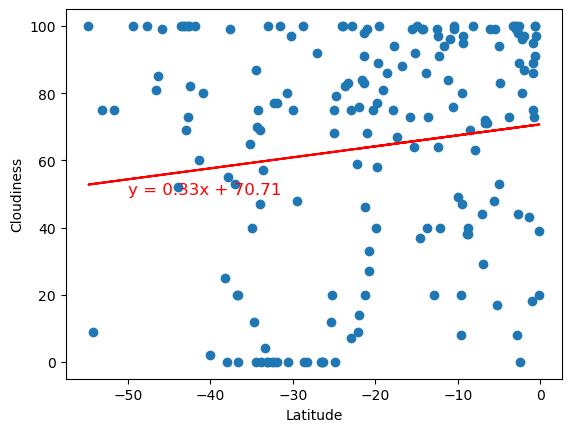

In [63]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

Discussion about the linear relationship: In the northern hemisphere there is a positive value for the r value meaning there is a 'perfect positive correlation' between latitude and cloudiness. And in the southern hemisphere there is a positive value for the r value meaning there is a 'perfect positive correlation' between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.3072536891088555


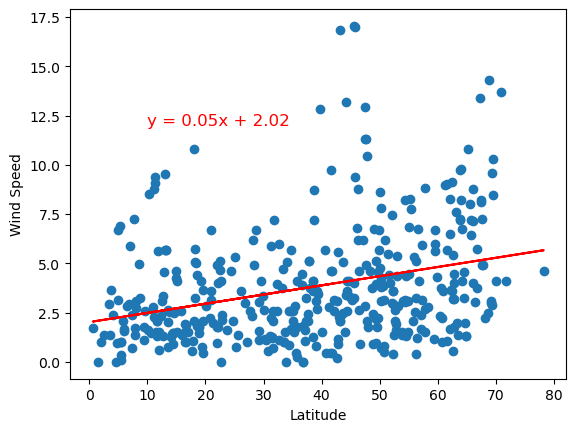

In [64]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.31446439055332615


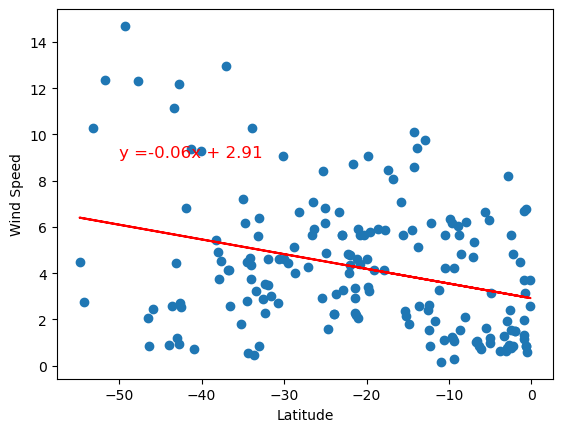

In [65]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

Discussion about the linear relationship: In the northern hemisphere there is a positive value for the r value meaning there is a 'perfect positive correlation' between latitude and wind speed. And in the southern hemisphere there is a negative value for the r value meaning there is a 'perfect negative correlation' between latitude and wind speed. 